In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

from non_linear_equations import draw_function

In [2]:
def lagrange_polynomial(x, n):
    x_points = np.linspace(-1, 1, n)
#     print(f"n={n}: {x_points}")
    y_points = f(x_points)
    n = len(x_points)
    accumulate_sum = 0
    for k in range(0, n):
        accumulate_product = 1
        for j in range(0, k):
            accumulate_product *= (x - x_points[j]) / (x_points[k] - x_points[j])
        for j in range(k + 1, n):
            accumulate_product *= (x - x_points[j]) / (x_points[k] - x_points[j])
        accumulate_sum += accumulate_product * y_points[k]
    return accumulate_sum

In [3]:
def f(x):
    return 1 / (1 + 25 * x ** 2)

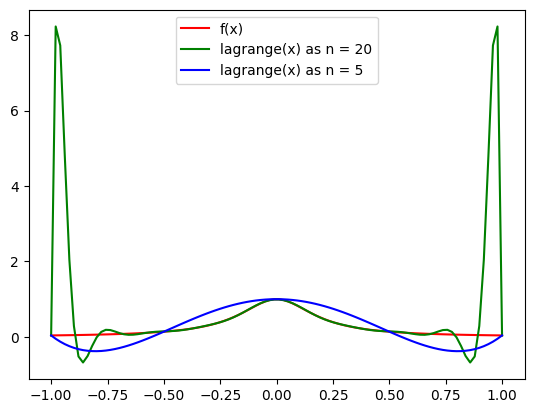

In [10]:
left = -1
right = 1
x = np.linspace(left, right, 100)
y = f(x)
lagrange_y_20 = lagrange_polynomial(x, 20)
lagrange_y_5 = lagrange_polynomial(x, 5)
plt.plot(x, y, color='r', label="f(x)")
plt.plot(x, lagrange_y_20, color='g', label="lagrange(x) as n = 20")
plt.plot(x, lagrange_y_5, color='b', label="lagrange(x) as n = 5")
plt.legend()
plt.show()

# print(f(-1))
# print(lagrange_polynomial(-1, 5))
# print(lagrange_polynomial(-1, 20))

In [135]:
def spline(x, y):
    a = [0.0 for _ in range(0, n)]
    b = [0.0 for _ in range(0, n)]
    c = [0.0 for _ in range(0, n)]
    d = [0.0 for _ in range(0, n)]
    # Инициализация массива сплайнов
    for i in range(0, n):
        a[i] = y[i]

    c[0] = 0.0
    c[n - 1] = 0.0

    alpha = [0.0 for _ in range(0, n - 1)]
    beta = [0.0 for _ in range(0, n - 1)]

    for i in range(1, n - 1):
        hi = x[i] - x[i - 1]
        hi1 = x[i + 1] - x[i]
        A = hi
        C = 2.0 * (hi + hi1)
        B = hi1
        F = 6.0 * ((y[i + 1] - y[i]) / hi1 - (y[i] - y[i - 1]) / hi)
        z = (A * alpha[i - 1] + C)
        alpha[i] = -B / z
        beta[i] = (F - A * beta[i - 1]) / z

    for i in range(n - 2, 0, -1):
        c[i] = alpha[i] * c[i + 1] + beta[i]

    for i in range(n - 1, 0, -1):
        hi = x[i] - x[i - 1]
        d[i] = (c[i] - c[i - 1]) / hi
        b[i] = hi * (2.0 * c[i] + c[i - 1]) / 6.0 + (y[i] - y[i - 1]) / hi
    return a, b, c, d

    return (a, b, c, d)

Left: -1.0 Right: -0.5
Left: -0.5 Right: 0.0
Left: 0.0 Right: 0.5
Left: 0.5 Right: 1.0


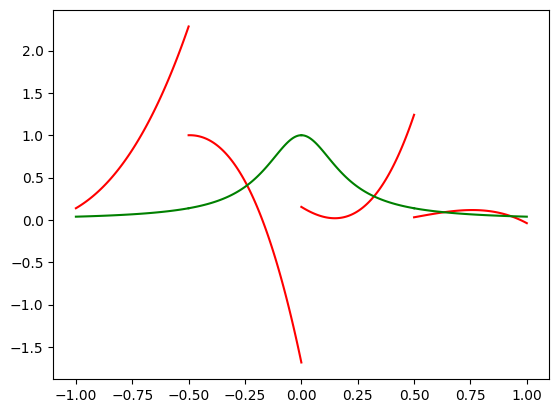

In [153]:
def inter_func(x):
     dx = x - x[i-1]
     return a[i] + b[i] * dx + (c[i] / 2.0) * dx ** 2 + (d[i]/6) * dx ** 3
# incorrect work during small n
n = 5
x = np.linspace(-1, 1, n)
y = f(x)
a,b,c,d = spline(x, y)
for i in range(1, n):
    left = x[i-1]
    right = x[i]
    print(f"Left: {left} Right: {right}")
    inner_segment = np.linspace(left, right, 100)
    plt.plot(inner_segment, inter_func(inner_segment), color='r', label="interpolated f(x)")
    plt.plot(inner_segment, f(inner_segment), color='g', label="f(x)")
# plt.legend()
plt.show()

In [127]:
print(a)
print(b)
print(c)

[0.03846154 0.04758766 0.06030738 0.07871784 0.10661548 0.15129925
 0.22761665 0.36612576 0.61604096 0.93523316 0.93523316 0.61604096
 0.36612576 0.22761665 0.15129925 0.10661548 0.07871784 0.06030738
 0.04758766 0.03846154]
[ 0.          0.09959066  0.14399203  0.21165121  0.32918375  0.54018393
  0.95861389  1.74791618  3.11981421  1.99238788 -1.99238788 -3.11981421
 -1.74791618 -0.95861389 -0.54018393 -0.32918375 -0.21165121 -0.14399203
 -0.09959066 -0.08025192]
[  0.           0.36743599   0.47619012   0.80933415   1.42378427
   2.58521899   5.36495038   9.63179314  16.43426936 -37.85536967
 -37.85536967  16.43426936   9.63179314   5.36495038   2.58521899
   1.42378427   0.80933415   0.47619012   0.36743599   0.        ]
[ 0.00000000e+00  3.49064189e+00  1.03316422e+00  3.16486834e+00
  5.83727609e+00  1.10336299e+01  2.64074482e+01  4.05350063e+01
  6.46235241e+01 -5.15751571e+02 -1.82254212e-12  5.15751571e+02
 -6.46235241e+01 -4.05350063e+01 -2.64074482e+01 -1.10336299e+01
 -5.8